# Assignment 3: Getting real with real data

In this assignment, we will get our hands dirty with real data, and start to learn and use the Python package [Pandas](http://pandas.pydata.org/). Pandas allows us to easily read data from various kinds of data sources, extract summaries of our data, and do many of the common data processing/exploration/transformation tasks easily. The main object in Pandas is called a Data Frame, which is basically a (possibly heterogeneous) matrix with named rows and columns.

Your first task is to read a quick start tutorial to Pandas.

- __`[ HW ]`__ Read [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) (feel free to open up a new notebook for yourself to play with the examples in this tutorial).

[Here](http://pandas.pydata.org/pandas-docs/stable/tutorials.html), you will find an additional set of tutorials, some of them in the form of IPython/Jupyter notebooks. Feel free to explore them, perhaps starting with the ones under the title "Lessons for New Pandas Users".

On the left panel of the 10 minutes tutorial, you will see links to more detailed documentation on various topics. Feel free to dive into these as you need; in particular, [Intro to data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html), [Indexing and selecting data](http://pandas.pydata.org/pandas-docs/stable/indexing.html), [Merge, join, and concatenate](http://pandas.pydata.org/pandas-docs/stable/merging.html), and [Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html) will be useful. Pandas also has a few plotting functions based on Matplotlib, which we started to use last week; you can read about those [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html).

This assignment comes with two datasets, `income_train.csv` and `income_test.csv`, both under the `data` subdirectory of this assignment's directory. These files contain some basic demographic information about a set of people, including a categorical variable for their yearly income (identifying whether the income is >= or < 50K). If you want, you can take a look at the files using the Sage interface; both of these are plain text (ASCII) files. 

The `train` and `test` in the filenames signify that we will use one of these files for training a machine learning model, and the other for testing/evaluating the model---we will do this in future assignments.

The file extension `.csv` stands for "comma-separated values"; each row represents one data point ("datum"), and the columns are separated by commas. Often (but not always), the first row in a CSV file is not a data row, but contains the column names instead, again separated by commas. (Note that column separators other than commas are often used; you will find tab-separated files, space-separated files, etc. People often refer to these as CSV files, as well.)

When some columns contain text, things may become confusing, since that text itself could contain commas, which would make it difficult to figure out the column boundaries. The CSV format sometimes deals with this by using quotation marks for columns that contain text. Of course, if the text itself contains quotation marks, things get confusing again :) Feel free to read more about CSV if you are curious about these sorts of things.

# Basics

Let's use Pandas to read our two datasets into two variables.

In [45]:
# Execute this cell to import Matplotlib, Seaborn, NumPy and Pandas (you should start to 
# learn these import statements; they should become automatic)
import matplotlib.pyplot as plt
# IPython "magic" command for making plots appear in the notebook ("inline")
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd 

##disable ipython autoscroll for large outputs
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [46]:
# Execute this cell to read the data file income_train.csv 

# We are telling Pandas that the symbol '?' represents a missing value in this 
# dataset (the acronym 'na' stands for 'not available', one also uses 'nan' or 
# 'NaN', which represent 'not a number')
# We are also telling Pandas the there is no column 
income_train = pd.read_csv('data/income_train.csv', na_values=['?']) #NA values are represented by ? in data

Note that By default, the `read_csv()` function in Pandas assumes that the first row has the column names. 
If this is not the case, you will have to override this default. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) for a full list of the available options to this function (so many!)

In [47]:
# Execute this cell to see the type of the income_train variable (note that 
# you can do this for any object in Python; feel free to try it every now
# and then on objects that seem mysterious to you)

print type(income_train)

<class 'pandas.core.frame.DataFrame'>


In [48]:
# Execute this cell to see the first few rows of the data
income_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,yearly-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
# [ HW ] Print the number of rows and columns of the data frame income_train
print "nrows\t",len(income_train)
print "ncols\t",len(income_train.columns)
print "shape\t",income_train.shape

nrows	32561
ncols	15
shape	(32561, 15)


In [50]:
# [ HW ] Similar to income_train, read the dataset income_test.csv 
# into a variable named income_test, and display its first few rows, and print
# its numbers of rows and columns
income_test = pd.read_csv('data/income_test.csv', na_values=['?'])
income_test.head()
print "nrows\t",income_test.shape[0]
print "ncols\t",income_test.shape[1]

nrows	16281
ncols	15


In [51]:
# [ HW ] Print the names of the columns in income_train
print '\n'.join(income_train.columns)

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
yearly-income


In Pandas, each column of a DataFrame has a "dtype", which represents the data type the column contains. This is actually inherited from NumPy, and note that the notion of dtype is intimately related to, but different from the `type` information in base Python. (Also note that Pandas is built on top of NumPy, so you can often use NumPy methods with Pandas objects.) 

Some common dtypes are integer, float, and object (which is a generic container type that is also used for categorical or text data).

In [52]:
# [ HW ] Print the dtypes of all the columns in income_train
income_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
yearly-income     object
dtype: object

In the 10-minute guide, you'll see the common ways of accessing elements of a `DataFrame` object by indices. Here are a couple of examples that get a few rows from the 'workclass' column.

In [53]:
# Integer-based selection, using .iloc[]
income_train.iloc[7:12,3:7]

,education,education-num,marital-status,occupation
7,HS-grad,9,Married-civ-spouse,Exec-managerial
8,Masters,14,Never-married,Prof-specialty
9,Bachelors,13,Married-civ-spouse,Exec-managerial
10,Some-college,10,Married-civ-spouse,Exec-managerial
11,Bachelors,13,Married-civ-spouse,Prof-specialty


In [54]:
# Index (label)-based selection, using .loc[]
income_train.loc[7:12,['marital-status','occupation']]

,marital-status,occupation
7,Married-civ-spouse,Exec-managerial
8,Never-married,Prof-specialty
9,Married-civ-spouse,Exec-managerial
10,Married-civ-spouse,Exec-managerial
11,Married-civ-spouse,Prof-specialty
12,Never-married,Adm-clerical


In [55]:
# Mixed indexing, using .ix[]
income_train.ix[7:12,'workclass':'race']

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race
7,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White
8,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White
9,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White
10,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black
11,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander
12,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White


### [iloc vs ix vs loc explanation | stackoverflow](http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation)
First, a recap:

- loc works on labels in the index.
- iloc works on the positions in the index (so it only takes integers).
- ix usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.
It's important to note some subtleties that can make ix slightly tricky to use:

if the index is of integer type, ix will only use label-based indexing and not fall back to position-based indexing. If the label is not in the index, an error is raised.
if the index does not contain only integers, then given an integer, ix will immediately use position-based indexing rather than label-based indexing. If however ix is given another type (e.g. a string), it can use label-based indexing.

In [56]:
# Column name indexing, using []
income_train['workclass'][7:12]

7     Self-emp-not-inc
8              Private
9              Private
10             Private
11           State-gov
Name: workclass, dtype: object

In [57]:
# Column name indexing, using . (dot)
income_train.workclass[7:12]

7     Self-emp-not-inc
8              Private
9              Private
10             Private
11           State-gov
Name: workclass, dtype: object

In [58]:
print type(income_train)
print type(income_train.workclass[7:12])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Note that in the last two examples, `income_train['workclass']` and `income.workclass` return the full column in a Pandas `Series` object. Make sure you have some facility with `Series` objects.

There is another important data selection method: [Boolean indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing). Read about it if you aren't yet familiar with it. 

In [59]:
# [ HW ] Define a new data frame, income_train_children, that consists of 
# the rows in income_train where the age column is less than 18 (note that you 
# should get a data frame with 395 rows)

income_train_children = income_train[income_train.age < 18]
print len(income_train_children)

395


# Exploratory data analysis

Next, let's start to do some exploratory data analysis (EDA). We will begin by obtaining the counts of the unique values that occur in the workclass column.

In [60]:
# Execute this cell
print income_train['workclass'].unique()

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [61]:
# Execute this cell
print income_train['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


And let's calculate the mean of a numerical column. This time we will use the dot technique to obtain the column (instead of `income_train['age']`, we will use `income_train.age`.

In [62]:
# Execute this cell
print income_train.age.mean()

38.5816467553


Next, let's identify all the categorical and numerical columns, and obtain some summary statistics for each one of them. Let's start by identifying categorical columns. I will use the useful Python technique of list comprehension. If this is unfamiliar, you can read about it, e.g., [here](http://www.secnetix.de/olli/Python/list_comprehensions.hawk).

In [63]:
# Execute this cell
catcols = [c for c in income_train.columns if income_train[c].dtype is np.dtype(object)] #categorical columns
print catcols

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'yearly-income']


In [64]:
# [ HW ] Similar to above, define a variable named intcols, which contains the 
# list of column names for integer columns
intcols = [i for i in income_train.columns if income_train[i].dtype is np.dtype(int)]
print intcols

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [65]:
# [ HW ] Write a for loop that goes over all the categorical columns
# one by one, and prints the value counts for all the unique categories that occur in each of them

#cat_val_counts = [income_train[col].value_counts() for col in catcols]
#print cat_val_counts ## this works but it is not pretty
for col in catcols:
    print col
    print income_train[col].value_counts()
    print "\n"

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      406

In [66]:
# [ HW ] Next, write a for loop that goes over all the integer columns,
# and prints out the mean, median, and standard deviation for all 
for col in intcols:
    print col
    print "mean\t",income_train[col].mean()
    print "median\t",income_train[col].median()
    print "std\t",income_train[col].std(),"\n"

age
mean	38.5816467553
median	37.0
std	13.6404325536 

fnlwgt
mean	189778.366512
median	178356.0
std	105549.977697 

education-num
mean	10.0806793403
median	10.0
std	2.57272033207 

capital-gain
mean	1077.64884371
median	0.0
std	7385.29208484 

capital-loss
mean	87.303829735
median	0.0
std	402.960218649 

hours-per-week
mean	40.4374558521
median	40.0
std	12.3474286817 



Pandas has a method called `isnull()` that reports whether an entry is missing or not. Using this, obtain the missing value counts for all the columns of `income_train`. Your code should create a dictionary with the keys being the column names of `income_train`, and the values being the missing value counts.

In [67]:
# [ HW ] Create a dictionary named missing_val_counts that contains the
# number of missing values for each column of income_train
missing_val_counts = {col: income_train[col].isnull().sum(axis=0) for col in income_train.columns}
missing_val_counts # took some time to figure out :) 

{'age': 0,
 'capital-gain': 0,
 'capital-loss': 0,
 'education': 0,
 'education-num': 0,
 'fnlwgt': 0,
 'hours-per-week': 0,
 'marital-status': 0,
 'native-country': 583,
 'occupation': 1843,
 'race': 0,
 'relationship': 0,
 'sex': 0,
 'workclass': 1836,
 'yearly-income': 0}

You can do the problem above by using a `for` loop, but if you want to feel like an expert, you can also use a dictionary comprehension. Here is an example, if you are curious:

In [68]:
# A dictionary that has values = exclamation marks appended at the end of keys
dict_comprehension_example = {a: a + '!' for a in ['a','b','c']}

print dict_comprehension_example
print
print dict_comprehension_example['b']

{'a': 'a!', 'c': 'c!', 'b': 'b!'}

b!


In [69]:
# [ HW ] Print the number of rows in income_train with the hours-per-week column less than 40

income_train[income_train['hours-per-week'] <40].shape[0] # OR
income_train['hours-per-week'][income_train['hours-per-week'] <40].count()
# I dont know which one is better :) 

7763

# Visualization

Finally, let's do some visualization. I will give a few required problems, but please look at the Seaborn and Matplotlib tutorials, and dive into this dataset as much as you want, and create additional visualizations for yourself.

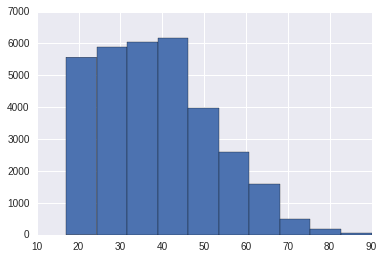

In [70]:
# [ HW ] Pandas Series objects (i.e., columns of Data Frame objects) have a .hist() method that displays
# a histogram. Using this plot a histogram of the age column of income_train
income_train.age.hist()

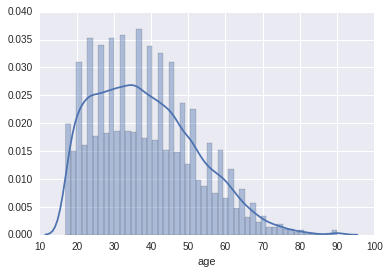

In [71]:
# [ HW ] Using the distplot() function of Seaborn (i.e., sns.distplot()), plot the
# distribution of the age column in income_train. This will show a continuous
# plot of the density, superposed with a histogram.

sns.distplot(income_train.age) ## STANFORD SEABORN SITE IS INACCESSIBLE :'(

Feel free to expand on the basic requirement above, adding a plot title, axis labels, and playing with the additional options. (Not a requirement for the homework)

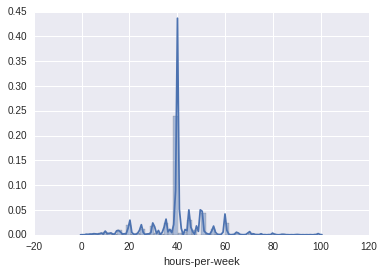

In [72]:
# [ HW ] Repeat the distplot() exercise above for a few other numerical (integer) columns

sns.distplot(income_train['hours-per-week'])

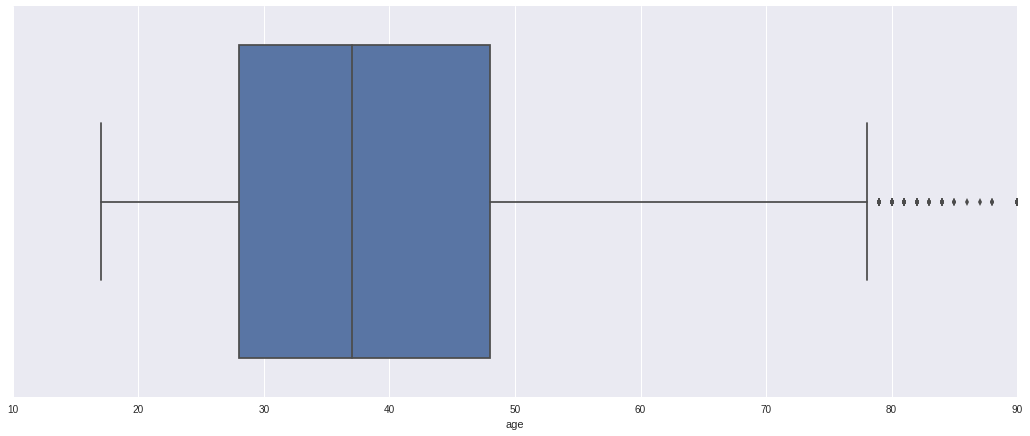

In [95]:
# [ HW ] Read about box plots from Wikipedia if you are not already familiar with 
# them (https://en.wikipedia.org/wiki/Box_plot), and using the boxplot() function of
# Seaborn, get a boxplot for the age column of income_train
plt.figure(figsize=(18,7))
#sns.boxplot(income_train.age,income_train.age.value_counts())
sns.boxplot(income_train.age)

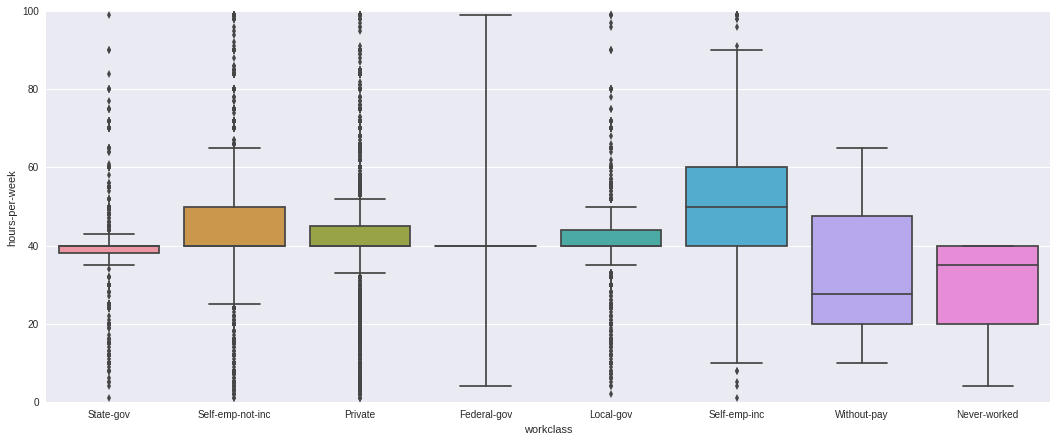

In [86]:
# ????????????????????????????????????????????????????????????????????? #
# ????????????????????????????????????????????????????????????????????? #
# ????????????????????????????????????????????????????????????????????? #
# ????????????????????????????????????????????????????????????????????? #
# [ HW ] Again using boxplot(), obtain a seris of boxplots for the 
# hours-per-week column; one plot per workclass category
# Note that you don't need to write a loop; you can do this in one 
# single sns.boxplot() command

plt.figure(figsize=(18,7))
sns.boxplot(income_train['hours-per-week'], groupby=income_train['workclass'])


You can use the Matplotlib plot command with a symbol to get scatter plots. Here is an example:

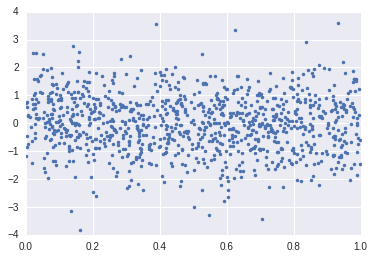

In [87]:
x_rand = np.random.rand(1000)
y_rand = np.random.randn(1000)
plt.plot(x_rand,y_rand,'.')
plt.show()

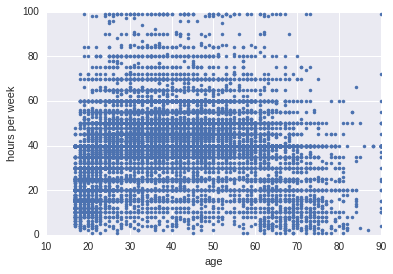

In [88]:
# [ HW ] Obtain a scatter plot of age vs. hours-per-week for the 
# income_train dataset

plt.plot(income_train['age'],income_train['hours-per-week'],'.')
plt.xlabel('age')
plt.ylabel('hours per week')

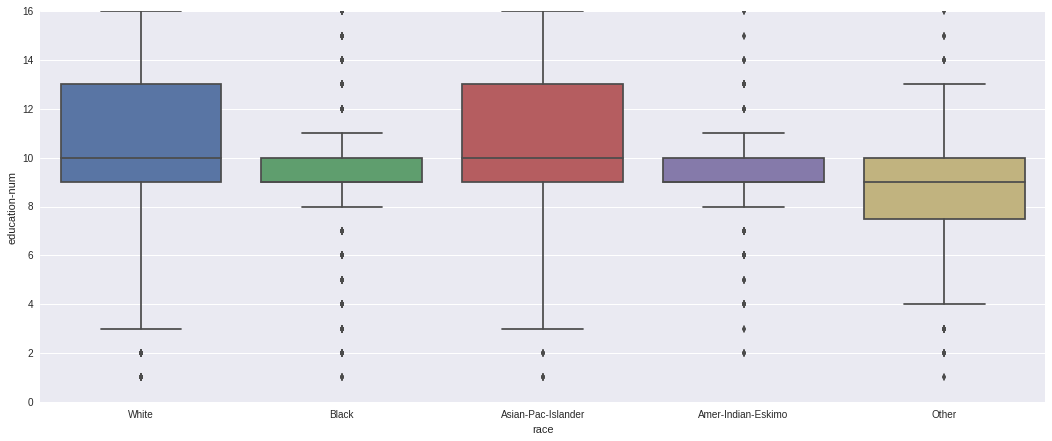

In [112]:
# [ HW ] Dive into Matplotlib and Seaborn examples online, and create at least 3 more plots of your own, 
# using the income_train dataset. Visualize things you are curious about!

plt.figure(figsize=(18,7))
sns.boxplot(income_train['education-num'], groupby=income_train['race'])

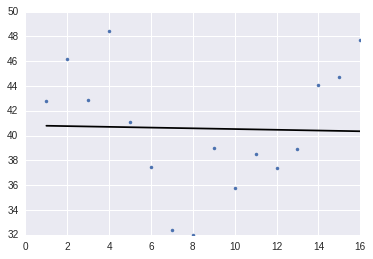

In [141]:
mean_by_education = income_train[ [col for col in intcols] ].groupby('education-num').mean() 
mean_by_education.head()

plt.plot(mean_by_education['age'],'.')

# fit_fn is now a function which takes in x and returns an estimate for y ##http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
fit = np.polyfit(mean_by_education.index,mean_by_education['age'],1)
fit_fn = np.poly1d(fit) 
plt.plot(mean_by_education.index, fit_fn(mean_by_education.index), '-k')

plt.show()

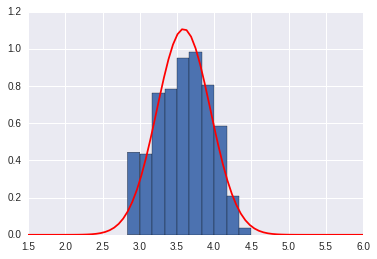

In [158]:
#mean_by_education = income_train[ [col for col in intcols] ].groupby('education-num').mean() 
#mean_by_education.head()

income_train['log_age'].hist(normed=True)
from scipy.stats import norm
mu, std = norm.fit(income_train['log_age'])
x = np.linspace(1.5,6,75)
y = norm.pdf(x,mu,std)
plt.plot(x,y,"r-",label="Normal Fit")
plt.show()

## normal dist fits the log_age best compared to age and normalized age

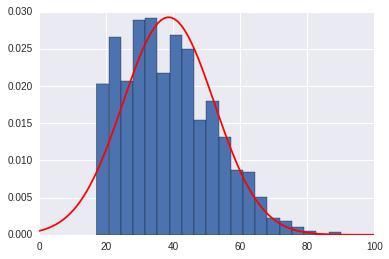

In [156]:
income_train['age'].hist(normed=True)
mu, std = norm.fit(income_train['age'])
x = np.linspace(0,100,100)
y = norm.pdf(x,mu,std)
plt.plot(x,y,"r-",label="Normal Fit")
plt.show()

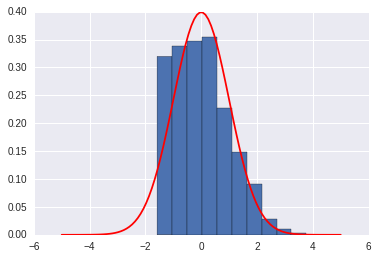

In [155]:
income_train['normalized_age'].hist(normed=True)
mu, std = norm.fit(income_train['normalized_age'])
x = np.linspace(-5,5,100)
y = norm.pdf(x,mu,std)
plt.plot(x,y,"r-",label="Normal Fit")
plt.show()

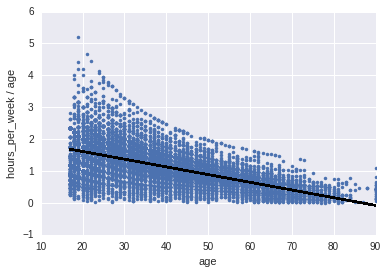

In [164]:
plt.plot(income_train['age'], income_train['hpv_over_age'], '.')

fit = np.polyfit(income_train['age'],income_train['hpv_over_age'],1)
fit_fn = np.poly1d(fit) 
plt.plot(income_train['age'], fit_fn(income_train['age']), '-k')
plt.xlabel('age')
plt.ylabel('hours_per_week / age')

plt.show()

# Basic transformation and featurization

In [90]:
# [ HW ] Create a new column in income_train called log_age that contains the logarithms of the ages
income_train['log_age'] = income_train['age'].apply(np.log)
income_train[['age','log_age']].head()

,age,log_age
0,39,3.663562
1,50,3.912023
2,38,3.637586
3,53,3.970292
4,28,3.332205


In [91]:
# [ HW ] Replace the missing values in the native-country column with the string 'unknown_country'

#temp_test = income_train['native-country'].fillna('unknown_country')
#temp_test.unique()
income_train['native_country'] = income_train['native-country'].fillna('unknown_country')


In [92]:
# [ HW ] Create a new column in income_train called hpv_over_age that contains the
# hours-per-week column divided by the age column

income_train['hpv_over_age'] = income_train['hours-per-week'] / income_train['age']
income_train[['hours-per-week','age','hpv_over_age']].head()

,hours-per-week,age,hpv_over_age
0,40,39,1.025641
1,13,50,0.260000
2,40,38,1.052632
3,40,53,0.754717
4,40,28,1.428571


In [93]:
# [ HW ] Create a new column in income_train called normalized_age that consists of 
# (age - (mean age)) / (standard deviation of age), i.e. subtract the average age 
# from the age of every body, and divide the result by the standard deviation of the age

income_train['normalized_age'] = (income_train['age'] - income_train['age'].mean()) / income_train['age'].std()
print "mean\t",income_train['age'].mean()
print "std\t",income_train['age'].std()
income_train [ ['normalized_age','age'] ] .head()

mean	38.5816467553
std	13.6404325536


,normalized_age,age
0,0.030670,39
1,0.837096,50
2,-0.042641,38
3,1.057031,53
4,-0.775756,28
